#### "" IMPORT DATA TO MYSQL >> 15 min""

In [ ]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

In [ ]:
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query_empty = """truncate table prediction.data15min""" 
c.execute(query_empty)
print "prediction.data15min are Empty!!! \n"

j = 0
sum_p = 0
sum_meter1 = 0
sum_meter2 = 0
sum_meter3 = 0
sum_meter4 = 0
d = 30

time_a = pd.date_range('2007-01-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2007-01-01 00:14:59', periods=96*d, freq='15T')

while (j<= (96*d)-1):
    query = "SELECT * FROM prediction.data1min WHERE Timestamp >= '%s'   AND  Timestamp <= '%s'; " % (time_a[j],time_b[j])
    df = pd.read_sql(query, conn)
#     print len(df.active_power)
    if len(df.active_power) == 0 :
        min_p = 0
    else :
        for i in range(len(df.active_power)):
            sum_p += df.active_power[i]   
            sum_meter1  += df.Sub_metering_1[i]
            sum_meter2  += df.Sub_metering_2[i]
            sum_meter3  += df.Sub_metering_3[i]
            sum_meter4  += df.Sub_metering_4[i]
    c.execute("INSERT INTO prediction.data15min (Timestamp, active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4) VALUES ( %s, %s, %s, %s, %s, %s)",(time_b[j],sum_p,sum_meter1 ,sum_meter2 ,sum_meter3, sum_meter4 ))
    conn.commit()
    sum_p = 0
    sum_meter1  = 0
    sum_meter2  = 0
    sum_meter3  = 0
    sum_meter4  = 0
    j += 1
      
print(".DONE!")        


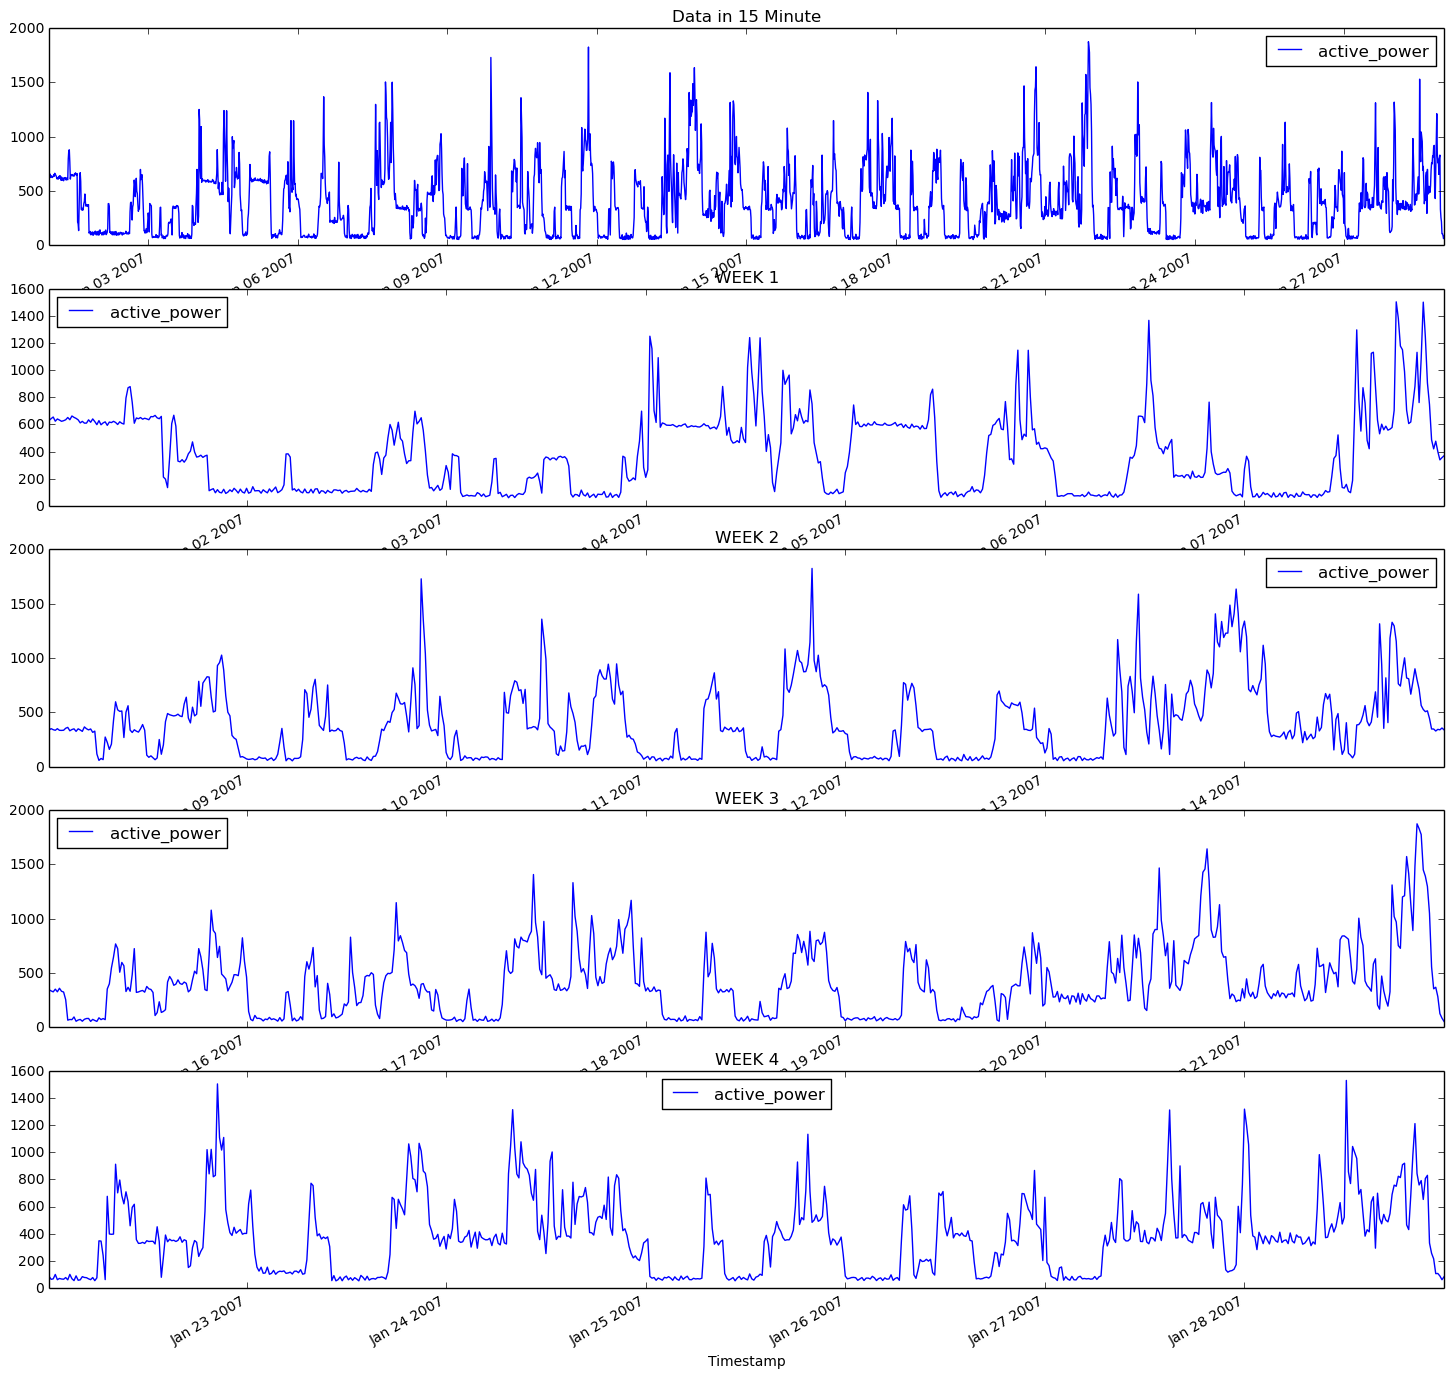

In [15]:
import matplotlib.pyplot as plt
import MySQLdb
import numpy as np
%matplotlib inline 

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query = "SELECT Timestamp,active_power FROM prediction.data15min WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% ('2007-01-01 00:00:00','2007-01-28 23:59:59')
df = pd.read_sql(query, conn,index_col= ['Timestamp'])

query1 = "SELECT Timestamp,active_power FROM prediction.data15min WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% ('2007-01-01 00:00:00','2007-01-07 23:59:59')
df1 = pd.read_sql(query1, conn,index_col= ['Timestamp'])

query2 = "SELECT Timestamp,active_power FROM prediction.data15min WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% ('2007-01-08 00:00:00','2007-01-14 23:59:59')
df2 = pd.read_sql(query2, conn,index_col= ['Timestamp'])

query3 = "SELECT Timestamp,active_power FROM prediction.data15min WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% ('2007-01-15 00:00:00','2007-01-21 23:59:59')
df3 = pd.read_sql(query3, conn,index_col= ['Timestamp'])

query4 = "SELECT Timestamp,active_power FROM prediction.data15min WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% ('2007-01-22 00:00:00','2007-01-28 23:59:59')
df4 = pd.read_sql(query4, conn,index_col= ['Timestamp'])

fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=5,figsize=(9*2, 9*2))
ax0.set_title('Data in 15 Minute')
ax1.set_title('WEEK 1')
ax2.set_title('WEEK 2')
ax3.set_title('WEEK 3')
ax4.set_title('WEEK 4')

df.plot(ax=ax0)
df1.plot(ax=ax1)
df2.plot(ax=ax2)
df3.plot(ax=ax3)
df4.plot(ax=ax4)
plt.show()
